In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [70]:
df = pd.read_csv("/content/fraud_txn.csv")

In [71]:
df.head()

,TXN_TIMESTAMP,TRANSACTION_ID,RRN,TRN_STATUS,AMOUNT,RESPONSE_CODE,PAYER_VPA,PAYER_CODE,PAYER_IFSC,PAYER_ACCOUNT,...,LONGITUDE,LATITUDE,DEVICE_ID,INITIATION_MODE,UPI_LITE_LRN,CARD_NUMBER,TRANSACTION_TYPE,PAYMENT_INSTRUMENT,IP_ADDRESS,IS_FRAUD
0,01/03/2025 13:51,c9bf0472742251ad80fe,762184f5397b8ec020f1,COMPLETED,1.0,0,e3b9072ba0be9291d0c4@axl,0,ff672a0c87c64a83e142,e762528cd21317b6ea21,...,8hoIOh10A7Qq76/YclrTVQ==,wGG9nld0Q1KYo4oU+a50Tg==,QYCDG0GPMDCY2NRXDMMLLOZC5YAC1EJSD2T,Default,NaN,NaN,P2P,UPI,1db5d33a79fe928f2947,0
1,01/03/2025 22:10,5faeb3453a0976f8c694,78985f52b9a1ebd74fe5,COMPLETED,250.0,0,fe7e02e4f383114f5db0@centralbank,0,28088b1f2f48bbdd8453,3e710cfae1f96a9a87e7,...,34BbQlLIagwmaErKqKsSTQ==,a8269HK8vua90V+joxjBIg==,25f6dde356db5125,Default,NaN,NaN,P2P,UPI,aeb88df774e26e92b409,0
2,02/03/2025 16:46,109837b52fea98ec8d34,b73c128d930c92815edd,COMPLETED,500.0,0,fe7e02e4f383114f5db0@centralbank,0,28088b1f2f48bbdd8453,3e710cfae1f96a9a87e7,...,Q7VnE9X/qJaFKOgqdpK7dQ==,DwM8wnOmUby6dhZnkjtoSg==,25f6dde356db5125,Default,NaN,NaN,P2P,UPI,419029d115ced5602a5c,0
3,03/03/2025 12:53,4636d2431685ccb999b9,ce19533f5f3e21d25d65,COMPLETED,10000.0,0,d485f4ea4b3327917d9c@pthdfc,0,05877e798bf097ac74cc,cd181fa5c60010afb675,...,Zq5yGzk39Ck8rrF1e96Scw==,f+DFJyDvJxOabkOYvmjiTQ==,7394c52d3fada667,Default,NaN,NaN,P2P,UPI,4dab9eda506526f217f8,0
4,05/03/2025 22:05,009036513541c903d2c1,9952cbfdeb8b72a2e4e2,COMPLETED,10000.0,0,c6673f3dfea8a58492b8@okhdfcbank,0,05877e798bf097ac74cc,cd181fa5c60010afb675,...,dmqpU7wj0yi6/zyY4oAFKA==,xDuIaJEN29vtxYAS1SXStw==,2e773d08f0da663c,Default,NaN,NaN,P2P,UPI,070fef5f43ad5315bb6f,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TXN_TIMESTAMP        2881 non-null   object 
 1   TRANSACTION_ID       2881 non-null   object 
 2   RRN                  2881 non-null   object 
 3   TRN_STATUS           2881 non-null   object 
 4   AMOUNT               2881 non-null   float64
 5   RESPONSE_CODE        2881 non-null   object 
 6   PAYER_VPA            2881 non-null   object 
 7   PAYER_CODE           2881 non-null   int64  
 8   PAYER_IFSC           2881 non-null   object 
 9   PAYER_ACCOUNT        2881 non-null   object 
 10  BENEFICIARY_VPA      2881 non-null   object 
 11  BENEFICIARY_CODE     2881 non-null   int64  
 12  BENEFICIARY_IFSC     2830 non-null   object 
 13  BENEFICIARY_ACCOUNT  2830 non-null   object 
 14  LONGITUDE            2858 non-null   object 
 15  LATITUDE             2858 non-null   o

In [73]:
print(df["IS_FRAUD"].value_counts())

IS_FRAUD
0    2499
1     382
Name: count, dtype: int64


In [74]:
print(df.isnull().sum().sum())

5915


In [75]:
df.isnull().sum()

,0
TXN_TIMESTAMP,0
TRANSACTION_ID,0
RRN,0
TRN_STATUS,0
AMOUNT,0
RESPONSE_CODE,0
PAYER_VPA,0
PAYER_CODE,0
PAYER_IFSC,0
PAYER_ACCOUNT,0


In [76]:
df.shape[0]

2881

In [77]:
round((df["IS_FRAUD"].value_counts()[1] / df.shape[0])*100,2)

np.float64(13.26)

In [78]:
df.drop(columns=["CARD_NUMBER", "UPI_LITE_LRN"], inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TXN_TIMESTAMP        2881 non-null   object 
 1   TRANSACTION_ID       2881 non-null   object 
 2   RRN                  2881 non-null   object 
 3   TRN_STATUS           2881 non-null   object 
 4   AMOUNT               2881 non-null   float64
 5   RESPONSE_CODE        2881 non-null   object 
 6   PAYER_VPA            2881 non-null   object 
 7   PAYER_CODE           2881 non-null   int64  
 8   PAYER_IFSC           2881 non-null   object 
 9   PAYER_ACCOUNT        2881 non-null   object 
 10  BENEFICIARY_VPA      2881 non-null   object 
 11  BENEFICIARY_CODE     2881 non-null   int64  
 12  BENEFICIARY_IFSC     2830 non-null   object 
 13  BENEFICIARY_ACCOUNT  2830 non-null   object 
 14  LONGITUDE            2858 non-null   object 
 15  LATITUDE             2858 non-null   o

In [80]:
df.isnull().sum()

,0
TXN_TIMESTAMP,0
TRANSACTION_ID,0
RRN,0
TRN_STATUS,0
AMOUNT,0
RESPONSE_CODE,0
PAYER_VPA,0
PAYER_CODE,0
PAYER_IFSC,0
PAYER_ACCOUNT,0


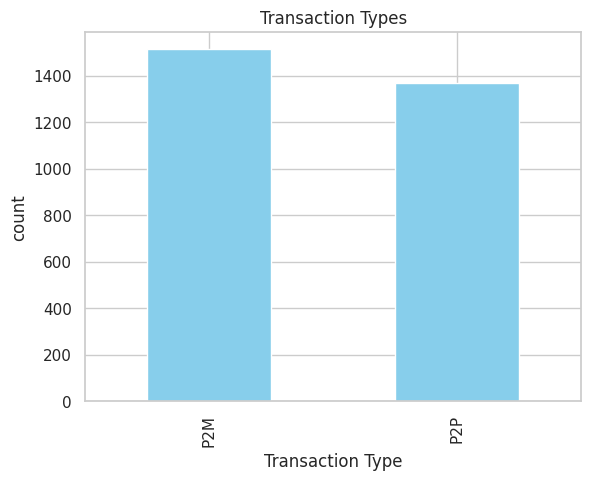

In [81]:
df["TRANSACTION_TYPE"].value_counts().plot(kind="bar",title="Transaction Types", color = "skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("count")
plt.show()

In [82]:
print(df["INITIATION_MODE"].value_counts())

INITIATION_MODE
Default                           1382
QR Code                           1004
Intent                             206
Mandate                            158
Secure QR Code                      97
Online Static QR Code               11
Dynamic Qr Code                     10
BHARAT QR Code                       7
SDK (Software development Kit)       2
Secure Intent                        1
Name: count, dtype: int64


In [83]:
print(df["PAYER_CODE"].value_counts())

PAYER_CODE
0    2881
Name: count, dtype: int64


In [84]:
print(df["TRANSACTION_ID"].value_counts())

TRANSACTION_ID
c8e342d90bc515e7ffce    1
d58eac904fc61b12d7fd    1
f79f9d65f1a8cae014b0    1
ac7724d6e6f7a2db2fbf    1
cb80a9ab3db483b89b07    1
                       ..
0f02e84cdd56cf16d1c1    1
009036513541c903d2c1    1
4636d2431685ccb999b9    1
109837b52fea98ec8d34    1
5faeb3453a0976f8c694    1
Name: count, Length: 2881, dtype: int64


In [85]:
print(df["TXN_TIMESTAMP"].value_counts())

TXN_TIMESTAMP
08/03/2025 12:24    5
05/03/2025 13:08    5
02/03/2025 19:51    4
05/03/2025 20:10    4
06/03/2025 10:31    4
                   ..
09/03/2025 17:39    1
07/03/2025 03:02    1
08/03/2025 11:28    1
09/03/2025 04:33    1
08/03/2025 04:44    1
Name: count, Length: 2364, dtype: int64


In [86]:
print(df["RRN"].value_counts())

RRN
de15a6363a70c9f9771f    1
f3863db851d1a5d0685d    1
60d1292d677a78f7d42a    1
1ea0b91f2f5f84a8ee0e    1
8259792ee4790f01376d    1
                       ..
7ea49e2cbdcd4ca66b82    1
9952cbfdeb8b72a2e4e2    1
ce19533f5f3e21d25d65    1
b73c128d930c92815edd    1
78985f52b9a1ebd74fe5    1
Name: count, Length: 2881, dtype: int64


In [87]:
print(df["TRN_STATUS"].value_counts())

TRN_STATUS
COMPLETED    2288
FAILED        593
Name: count, dtype: int64


In [88]:
print(df["RESPONSE_CODE"].value_counts())

RESPONSE_CODE
0     2288
Z7     302
Z9     135
B3      61
ZM      49
YE      17
Z6      13
XY       8
B1       3
Z8       3
V1       2
Name: count, dtype: int64


In [89]:
print(df["PAYER_VPA"].value_counts())

PAYER_VPA
e39029d4eaf33c9db294@okaxis         50
1d8b1a604a92d4e367e9@ybl            49
fe7e02e4f383114f5db0@centralbank    38
5fd1caf029543f95d7ef@okhdfcbank     38
be19b00c9397eb2bf587@ybl            33
                                    ..
2d313330f639227f5091@okaxis          1
2138acb3e416f4a9ae1a@okhdfcbank      1
b7f594dff449d63dc285@okhdfcbank      1
b2d7fcf807c7870ad048@ybl             1
1ff7a0f91e04588021ec@axl             1
Name: count, Length: 500, dtype: int64


In [90]:
print(df["PAYER_IFSC"].value_counts())

PAYER_IFSC
eaff3cdef03533f20c88    108
28088b1f2f48bbdd8453     96
1715df183353c6c5f193     66
3c182ba440b9f9daeb84     64
d8b7ac0773197f0174e7     61
                       ... 
b44d17bad559ec036d10      3
4159636495d0edf027f8      2
8a6e0a413f3fd0395469      2
cd34769e10988500bb36      2
3e11dee846a095673f35      1
Name: count, Length: 156, dtype: int64


In [91]:
print(df["PAYER_ACCOUNT"].value_counts())

PAYER_ACCOUNT
3e710cfae1f96a9a87e7    96
80227ef230f00adf5a11    64
43b12f98aff45f016d34    60
d7fd0694d1b478ce6208    58
c57e7068375b0a666b4c    56
                        ..
bb63d551b899958da455     2
5073a80d68759e65348b     2
f976fa601dd0a0b74881     2
14d6d7acba58337f510d     1
30b02b5b6fae4b1c7630     1
Name: count, Length: 167, dtype: int64


In [92]:
print(df["BENEFICIARY_VPA"].value_counts())

BENEFICIARY_VPA
f1f93ef0de5ff5ed8b74@ybl          49
8866a5f679ba14e440b9@ybl          33
8e440973ef80e70b3121@mairtel      23
766addf0a1e99f45198a@okpayaxis    16
1ad5c9a4765bd34db2f5@ybl          16
                                  ..
5a1ddd52816cb6340389@axl           1
be1245ca383589d0ad78@dhani         1
fcd8c86de8749f2958f8@oksbi         1
04bb9e3e19cc5effed26@ptybl         1
0a80beeb6313bf89bc8b@hdfcbank      1
Name: count, Length: 1727, dtype: int64


In [93]:
print(df["BENEFICIARY_CODE"].value_counts())

BENEFICIARY_CODE
0       1367
5411     313
4814     177
5812     100
5814      96
        ... 
5199       1
5994       1
7277       1
1761       1
6051       1
Name: count, Length: 118, dtype: int64


In [94]:
print(df["BENEFICIARY_IFSC"].value_counts())

BENEFICIARY_IFSC
dd2b26fa3b226776415f    418
1b05711b64781077ef00    324
04eaf61b02dae5d873b8    131
9e6939702423dd6ececd     97
d160d8e0828f0ff9193d     81
                       ... 
654d712a3b59a1d0df23      1
002dd52ae2fc8d76c065      1
570c466a918d68d31208      1
286c7fc34ab386207d0d      1
95bd03fa463309fa68d9      1
Name: count, Length: 730, dtype: int64


In [95]:
print(df["BENEFICIARY_ACCOUNT"].value_counts())

BENEFICIARY_ACCOUNT
869ead85d9e1e58805d5    468
8f39d80f5947f2de68f6    328
b598281acd251a2b13e7     94
facc44de2022eb8ccfe2     77
7b47089b934d786b1a0e     41
                       ... 
3c1b525822e936c453d4      1
6872868c4e4c82d417ce      1
794d858321043868afb2      1
4cdc965e21747714b98e      1
f48cbfe6de4ece6ebd8b      1
Name: count, Length: 979, dtype: int64


In [96]:
print(df["LONGITUDE"].value_counts())

LONGITUDE
8jhdi4rquDwCR3Gntj0ofA==    416
Fa58uijnW2MuJ7D4dhb0Yw==    349
dXwLmyemsrF77NjMvroORQ==    177
B3jRFleVYFAXOQp2bPp7yw==    116
R83uZPgrWAUIrp3THAoJZQ==     40
                           ... 
hruun+hl6hhOzSPkreUExw==      1
txmdXaOJ7A4uikC1QzapDw==      1
yN7cM7ppeYmB3YlpfMdB0Q==      1
+cOkBVs0B5Vq9mmeg4pj2Q==      1
dKB0uk6NgH48mbcylYgccw==      1
Name: count, Length: 914, dtype: int64


In [97]:
print(df["LATITUDE"].value_counts())

LATITUDE
Bcdh6G+SndL4TGAiu/elpw==    416
Fa58uijnW2MuJ7D4dhb0Yw==    349
dXwLmyemsrF77NjMvroORQ==    177
r/4Wbe6Vu4FmQv/44tND+g==    110
RDkHnNZarumVMjn1xWlYFw==     40
                           ... 
PDrnRhPxJTP8/n7uPXWlDQ==      1
Fdt06P4X5x5VF33yhv0Mzw==      1
eoB9QGhNYTH21UfAvp+aCg==      1
jYvVrUlkyomviyFAe+9XxQ==      1
QRt/OyHW8qLcZpYvs5iOhg==      1
Name: count, Length: 913, dtype: int64


In [98]:
print(df["DEVICE_ID"].value_counts())

DEVICE_ID
868210034695367                        110
JKKARQPQJ8YBMVCNE9FENVIPVX1CP9EAB6U     54
9bef1dbeb790c085                        50
PKSZMWQVSWBCB5EFIOPL6UOSTCQC1P2FWPP     44
VENOOSKZX2BZH1VAQE0UMNE8ZSHIS85LFPL     42
                                      ... 
865236043534555                          1
c20ff5ff48ede4d9                         1
d35cf459d963d30a                         1
342b42747e60e49b                         1
c32d1a9b4e7e1592                         1
Name: count, Length: 312, dtype: int64


In [99]:
print(df["PAYMENT_INSTRUMENT"].value_counts())

PAYMENT_INSTRUMENT
UPI    2881
Name: count, dtype: int64


In [100]:
print(df["TRANSACTION_TYPE"].value_counts())

TRANSACTION_TYPE
P2M    1514
P2P    1367
Name: count, dtype: int64


In [101]:
print(df["IP_ADDRESS"].value_counts())

IP_ADDRESS
e6aa7cbe59af0a5b675a    54
14cc481b310e340b644a    49
cb431366586148518631    40
2646ba6cf33c62d2b3f3    38
743bf4d1816682345178    33
                        ..
548b7bb9c9e263b53051     1
cb8a83b2e9ec6e9c61e8     1
b84cc400909454988079     1
5dc8f157184660ea9960     1
ac9a6e1c013b9d12a97a     1
Name: count, Length: 1282, dtype: int64


In [102]:
print(df["IS_FRAUD"].value_counts())

IS_FRAUD
0    2499
1     382
Name: count, dtype: int64


In [103]:
df.drop(columns=["PAYMENT_INSTRUMENT", "PAYER_CODE"], inplace=True)

In [104]:
cols_with_missing = ["BENEFICIARY_IFSC", "BENEFICIARY_ACCOUNT", "LONGITUDE", "LATITUDE", "IP_ADDRESS", "INITIATION_MODE"]
missing_vs_fraud = df.groupby("IS_FRAUD")[cols_with_missing].apply(
    lambda x: x.isnull().mean() * 100
).T

print("Percentage of Missing Values with respect to IS_FRAUD:\n")
print(missing_vs_fraud)


Percentage of Missing Values with respect to IS_FRAUD:

IS_FRAUD                    0        1
BENEFICIARY_IFSC     1.880752  1.04712
BENEFICIARY_ACCOUNT  1.880752  1.04712
LONGITUDE            0.840336  0.52356
LATITUDE             0.840336  0.52356
IP_ADDRESS           0.840336  0.52356
INITIATION_MODE      0.120048  0.00000


In [105]:
df.dropna(subset=["BENEFICIARY_IFSC", "BENEFICIARY_ACCOUNT",
                  "LONGITUDE", "LATITUDE", "IP_ADDRESS", "INITIATION_MODE"],
          inplace=True)

print("New shape:", df.shape)


New shape: (2804, 20)


In [106]:
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 TXN_TIMESTAMP          0
TRANSACTION_ID         0
RRN                    0
TRN_STATUS             0
AMOUNT                 0
RESPONSE_CODE          0
PAYER_VPA              0
PAYER_IFSC             0
PAYER_ACCOUNT          0
BENEFICIARY_VPA        0
BENEFICIARY_CODE       0
BENEFICIARY_IFSC       0
BENEFICIARY_ACCOUNT    0
LONGITUDE              0
LATITUDE               0
DEVICE_ID              0
INITIATION_MODE        0
TRANSACTION_TYPE       0
IP_ADDRESS             0
IS_FRAUD               0
dtype: int64


In [107]:
df.drop(columns=["TRANSACTION_ID", "RRN"], inplace=True)

In [108]:
from datetime import datetime
df['TXN_TIMESTAMP'] = pd.to_datetime(df['TXN_TIMESTAMP'], format='%d/%m/%Y %H:%M')

# Extract features
df['day'] = df['TXN_TIMESTAMP'].dt.day
df['month'] = df['TXN_TIMESTAMP'].dt.month
df['year'] = df['TXN_TIMESTAMP'].dt.year
df['hour'] = df['TXN_TIMESTAMP'].dt.hour
df['minute'] = df['TXN_TIMESTAMP'].dt.minute
df['weekday'] = df['TXN_TIMESTAMP'].dt.weekday  # 0 = Monday, 6 = Sunday

# Optional: Reorder columns
df_features = df[['TXN_TIMESTAMP', 'day', 'month', 'year', 'hour', 'minute', 'weekday']]

# Display result
print(df_features)

# Optional: Save to CSV
# df_features.to_csv('txn_features.csv', index=False)

           TXN_TIMESTAMP  day  month  year  hour  minute  weekday
0    2025-03-01 13:51:00    1      3  2025    13      51        5
1    2025-03-01 22:10:00    1      3  2025    22      10        5
2    2025-03-02 16:46:00    2      3  2025    16      46        6
3    2025-03-03 12:53:00    3      3  2025    12      53        0
4    2025-03-05 22:05:00    5      3  2025    22       5        2
...                  ...  ...    ...   ...   ...     ...      ...
2875 2025-03-08 18:09:00    8      3  2025    18       9        5
2876 2025-03-08 18:09:00    8      3  2025    18       9        5
2877 2025-03-09 08:02:00    9      3  2025     8       2        6
2878 2025-03-09 07:53:00    9      3  2025     7      53        6
2879 2025-03-09 07:52:00    9      3  2025     7      52        6

[2804 rows x 7 columns]


In [109]:

unique_modes = df['INITIATION_MODE'].unique()

mode_mapping = {cat: idx for idx, cat in enumerate(unique_modes)}

df['INITIATION_MODE'] = df['INITIATION_MODE'].map(mode_mapping)
print("Initiation Mode Mapping:")
print(mode_mapping)
print("\nSample Encoded Values:")
print(df['INITIATION_MODE'].head())

Initiation Mode Mapping:
{'Default': 0, 'QR Code': 1, 'Secure QR Code': 2, 'BHARAT QR Code': 3, 'Intent': 4, 'Secure Intent': 5, 'SDK (Software development Kit)': 6, 'Mandate': 7, 'Dynamic Qr Code': 8, 'Online Static QR Code': 9}

Sample Encoded Values:
0    0
1    0
2    0
3    0
4    0
Name: INITIATION_MODE, dtype: int64


In [110]:
# Get unique categories
unique_statuses = df['TRN_STATUS'].unique()

# Create mapping (category → integer)
status_mapping = {cat: idx for idx, cat in enumerate(unique_statuses)}

# Apply mapping to the column
df['TRN_STATUS'] = df['TRN_STATUS'].map(status_mapping)

# Show the mapping and verify result
print("Transaction Status Mapping:")
print(status_mapping)
print("\nSample Encoded Values:")
print(df['TRN_STATUS'].head())

Transaction Status Mapping:
{'COMPLETED': 0, 'FAILED': 1}

Sample Encoded Values:
0    0
1    0
2    0
3    0
4    0
Name: TRN_STATUS, dtype: int64


In [111]:
# Get unique categories
unique_types = df['RESPONSE_CODE'].unique()

# Create mapping (category → integer)
type_mapping = {cat: idx for idx, cat in enumerate(unique_types)}

# Apply mapping to the column
df['RESPONSE_CODE'] = df['RESPONSE_CODE'].map(type_mapping)

# Show the mapping and verify result
print("Response Code Mapping:")
print(type_mapping)
print("\nSample Encoded Values:")
print(df['RESPONSE_CODE'].head())

Response Code Mapping:
{'0': 0, 'Z7': 1, 'ZM': 2, 'Z9': 3, 'B1': 4, 'YE': 5, 'B3': 6, 'Z6': 7, 'Z8': 8, 'XY': 9, 'V1': 10}

Sample Encoded Values:
0    0
1    0
2    0
3    0
4    0
Name: RESPONSE_CODE, dtype: int64


In [112]:
df.head()

,TXN_TIMESTAMP,TRN_STATUS,AMOUNT,RESPONSE_CODE,PAYER_VPA,PAYER_IFSC,PAYER_ACCOUNT,BENEFICIARY_VPA,BENEFICIARY_CODE,BENEFICIARY_IFSC,...,INITIATION_MODE,TRANSACTION_TYPE,IP_ADDRESS,IS_FRAUD,day,month,year,hour,minute,weekday
0,2025-03-01 13:51:00,0,1.0,0,e3b9072ba0be9291d0c4@axl,ff672a0c87c64a83e142,e762528cd21317b6ea21,d1030091030967ba0a0e@axl,0,e1ae1343bcf076602ea5,...,0,P2P,1db5d33a79fe928f2947,0,1,3,2025,13,51,5
1,2025-03-01 22:10:00,0,250.0,0,fe7e02e4f383114f5db0@centralbank,28088b1f2f48bbdd8453,3e710cfae1f96a9a87e7,46cbdf13adb6fcdacd91@cbin,0,9ece0c994136e869b45e,...,0,P2P,aeb88df774e26e92b409,0,1,3,2025,22,10,5
2,2025-03-02 16:46:00,0,500.0,0,fe7e02e4f383114f5db0@centralbank,28088b1f2f48bbdd8453,3e710cfae1f96a9a87e7,46cbdf13adb6fcdacd91@cbin,0,9ece0c994136e869b45e,...,0,P2P,419029d115ced5602a5c,0,2,3,2025,16,46,6
3,2025-03-03 12:53:00,0,10000.0,0,d485f4ea4b3327917d9c@pthdfc,05877e798bf097ac74cc,cd181fa5c60010afb675,d485f4ea4b3327917d9c@pthdfc,0,e07ef716eef009a76c6d,...,0,P2P,4dab9eda506526f217f8,0,3,3,2025,12,53,0
4,2025-03-05 22:05:00,0,10000.0,0,c6673f3dfea8a58492b8@okhdfcbank,05877e798bf097ac74cc,cd181fa5c60010afb675,0e5ea6b910ce164dfa54@okicici,0,10ac4771352888f4a0c6,...,0,P2P,070fef5f43ad5315bb6f,0,5,3,2025,22,5,2


In [113]:
unique_types = df['TRANSACTION_TYPE'].unique()
print(unique_types)


['P2P' 'P2M']


In [114]:
mapping = {value: index for index, value in enumerate(unique_types)}
print(mapping)


{'P2P': 0, 'P2M': 1}


In [115]:
df['TRANSACTION_TYPE_ENC'] = df['TRANSACTION_TYPE'].map(mapping)


In [116]:
print(df[['TRANSACTION_TYPE', 'TRANSACTION_TYPE_ENC']].head())


  TRANSACTION_TYPE  TRANSACTION_TYPE_ENC
0              P2P                     0
1              P2P                     0
2              P2P                     0
3              P2P                     0
4              P2P                     0


In [117]:
unique_vpa = df['PAYER_VPA'].unique()
print("Unique VPA count:", len(unique_vpa))
print("Sample values:", unique_vpa[:5])

Unique VPA count: 489
Sample values: ['e3b9072ba0be9291d0c4@axl' 'fe7e02e4f383114f5db0@centralbank'
 'd485f4ea4b3327917d9c@pthdfc' 'c6673f3dfea8a58492b8@okhdfcbank'
 'd485f4ea4b3327917d9c@ybl']


In [118]:
vpa_mapping = {value: index for index, value in enumerate(unique_vpa)}


In [119]:
vpa_mapping

{'e3b9072ba0be9291d0c4@axl': 0,
 'fe7e02e4f383114f5db0@centralbank': 1,
 'd485f4ea4b3327917d9c@pthdfc': 2,
 'c6673f3dfea8a58492b8@okhdfcbank': 3,
 'd485f4ea4b3327917d9c@ybl': 4,
 'e161812311b89e1b60ca@okicici': 5,
 '0f4236cae050a2677c65@okhdfcbank': 6,
 '1d8cfc88c73cb9931112@ibl': 7,
 '00f97965a454fe8cc87d@axl': 8,
 '0c6d56c38429433997b6@superyes': 9,
 'f094848406ee21ec5cd8@ybl': 10,
 '1e9bcf344e321691905a@ybl': 11,
 'e39029d4eaf33c9db294@okaxis': 12,
 'cb14099c7fc2c77ee106@oksbi': 13,
 'ca6e70fa85612a69285c@okicici': 14,
 '141802f9dec84d72615e@ptaxis': 15,
 '4c6bbf8149c6501bd47a@pthdfc': 16,
 '27e8c4c6bb7d1de0d8c1@axl': 17,
 'ff24204bebb92f97f936@okaxis': 18,
 '811cd0749ed04c3ec4dc@ybl': 19,
 'be19b00c9397eb2bf587@ybl': 20,
 'b102872adb7442f98735@okaxis': 21,
 '341d3564c6f23f6658a6@axl': 22,
 'c9ea45c1a54338ac74eb@ptaxis': 23,
 '2d5ac21139642b8c8b87@okhdfcbank': 24,
 '40f8045b32e9070f2857@okicici': 25,
 'd19d1d5b5f50387f77ab@ybl': 26,
 '14bac795da32e7205c88@oksbi': 27,
 '2af9601d86583

In [120]:
df['PAYER_VPA_ENC'] = df['PAYER_VPA'].map(vpa_mapping)


In [121]:
print(df[['PAYER_VPA', 'PAYER_VPA_ENC']].head(10))


                          PAYER_VPA  PAYER_VPA_ENC
0          e3b9072ba0be9291d0c4@axl              0
1  fe7e02e4f383114f5db0@centralbank              1
2  fe7e02e4f383114f5db0@centralbank              1
3       d485f4ea4b3327917d9c@pthdfc              2
4   c6673f3dfea8a58492b8@okhdfcbank              3
5   c6673f3dfea8a58492b8@okhdfcbank              3
6       d485f4ea4b3327917d9c@pthdfc              2
7  fe7e02e4f383114f5db0@centralbank              1
8   c6673f3dfea8a58492b8@okhdfcbank              3
9          d485f4ea4b3327917d9c@ybl              4


In [122]:
unique_ifsc = df['PAYER_IFSC'].unique()
ifsc_mapping = {value: index for index, value in enumerate(unique_ifsc)}
df['PAYER_IFSC_ENC'] = df['PAYER_IFSC'].map(ifsc_mapping)


In [123]:
unique_acc = df['PAYER_ACCOUNT'].unique()
acc_mapping = {value: index for index, value in enumerate(unique_acc)}
df['PAYER_ACCOUNT_ENC'] = df['PAYER_ACCOUNT'].map(acc_mapping)


In [124]:
unique_bvpa = df['BENEFICIARY_VPA'].unique()
bvpa_mapping = {value: index for index, value in enumerate(unique_bvpa)}
df['BENEFICIARY_VPA_ENC'] = df['BENEFICIARY_VPA'].map(bvpa_mapping)


In [125]:
unique_bifsc = df['BENEFICIARY_IFSC'].unique()
bifsc_mapping = {value: index for index, value in enumerate(unique_bifsc)}
df['BENEFICIARY_IFSC_ENC'] = df['BENEFICIARY_IFSC'].map(bifsc_mapping)


In [126]:
unique_bacc = df['BENEFICIARY_ACCOUNT'].unique()
bacc_mapping = {value: index for index, value in enumerate(unique_bacc)}
df['BENEFICIARY_ACCOUNT_ENC'] = df['BENEFICIARY_ACCOUNT'].map(bacc_mapping)


In [127]:
unique_dev = df['DEVICE_ID'].unique()
dev_mapping = {value: index for index, value in enumerate(unique_dev)}
df['DEVICE_ID_ENC'] = df['DEVICE_ID'].map(dev_mapping)


In [128]:
unique_ip = df['IP_ADDRESS'].unique()
ip_mapping = {value: index for index, value in enumerate(unique_ip)}
df['IP_ADDRESS_ENC'] = df['IP_ADDRESS'].map(ip_mapping)


In [129]:
df[['PAYER_VPA_ENC', 'PAYER_IFSC_ENC', 'PAYER_ACCOUNT_ENC',
    'BENEFICIARY_VPA_ENC', 'BENEFICIARY_IFSC_ENC',
    'BENEFICIARY_ACCOUNT_ENC', 'DEVICE_ID_ENC', 'IP_ADDRESS_ENC']].head()


,PAYER_VPA_ENC,PAYER_IFSC_ENC,PAYER_ACCOUNT_ENC,BENEFICIARY_VPA_ENC,BENEFICIARY_IFSC_ENC,BENEFICIARY_ACCOUNT_ENC,DEVICE_ID_ENC,IP_ADDRESS_ENC
0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,2
3,2,2,2,2,2,2,2,3
4,3,2,2,3,3,3,3,4


In [130]:
df.head()

,TXN_TIMESTAMP,TRN_STATUS,AMOUNT,RESPONSE_CODE,PAYER_VPA,PAYER_IFSC,PAYER_ACCOUNT,BENEFICIARY_VPA,BENEFICIARY_CODE,BENEFICIARY_IFSC,...,weekday,TRANSACTION_TYPE_ENC,PAYER_VPA_ENC,PAYER_IFSC_ENC,PAYER_ACCOUNT_ENC,BENEFICIARY_VPA_ENC,BENEFICIARY_IFSC_ENC,BENEFICIARY_ACCOUNT_ENC,DEVICE_ID_ENC,IP_ADDRESS_ENC
0,2025-03-01 13:51:00,0,1.0,0,e3b9072ba0be9291d0c4@axl,ff672a0c87c64a83e142,e762528cd21317b6ea21,d1030091030967ba0a0e@axl,0,e1ae1343bcf076602ea5,...,5,0,0,0,0,0,0,0,0,0
1,2025-03-01 22:10:00,0,250.0,0,fe7e02e4f383114f5db0@centralbank,28088b1f2f48bbdd8453,3e710cfae1f96a9a87e7,46cbdf13adb6fcdacd91@cbin,0,9ece0c994136e869b45e,...,5,0,1,1,1,1,1,1,1,1
2,2025-03-02 16:46:00,0,500.0,0,fe7e02e4f383114f5db0@centralbank,28088b1f2f48bbdd8453,3e710cfae1f96a9a87e7,46cbdf13adb6fcdacd91@cbin,0,9ece0c994136e869b45e,...,6,0,1,1,1,1,1,1,1,2
3,2025-03-03 12:53:00,0,10000.0,0,d485f4ea4b3327917d9c@pthdfc,05877e798bf097ac74cc,cd181fa5c60010afb675,d485f4ea4b3327917d9c@pthdfc,0,e07ef716eef009a76c6d,...,0,0,2,2,2,2,2,2,2,3
4,2025-03-05 22:05:00,0,10000.0,0,c6673f3dfea8a58492b8@okhdfcbank,05877e798bf097ac74cc,cd181fa5c60010afb675,0e5ea6b910ce164dfa54@okicici,0,10ac4771352888f4a0c6,...,2,0,3,2,2,3,3,3,3,4


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2804 entries, 0 to 2879
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TXN_TIMESTAMP            2804 non-null   datetime64[ns]
 1   TRN_STATUS               2804 non-null   int64         
 2   AMOUNT                   2804 non-null   float64       
 3   RESPONSE_CODE            2804 non-null   int64         
 4   PAYER_VPA                2804 non-null   object        
 5   PAYER_IFSC               2804 non-null   object        
 6   PAYER_ACCOUNT            2804 non-null   object        
 7   BENEFICIARY_VPA          2804 non-null   object        
 8   BENEFICIARY_CODE         2804 non-null   int64         
 9   BENEFICIARY_IFSC         2804 non-null   object        
 10  BENEFICIARY_ACCOUNT      2804 non-null   object        
 11  LONGITUDE                2804 non-null   object        
 12  LATITUDE                 2804 non-null 

In [132]:

# 1️⃣ Encode LATITUDE
unique_lat = df['LATITUDE'].unique()                               # get unique values
lat_mapping = {v: i for i, v in enumerate(unique_lat)}              # make mapping dict
df['LATITUDE_ENC'] = df['LATITUDE'].map(lat_mapping)                # replace with encoded

# 2️⃣ Encode LONGITUDE
unique_lon = df['LONGITUDE'].unique()
lon_mapping = {v: i for i, v in enumerate(unique_lon)}
df['LONGITUDE_ENC'] = df['LONGITUDE'].map(lon_mapping)

# 3️⃣ Verify encoding
print("Latitude unique count:", len(unique_lat))
print("Longitude unique count:", len(unique_lon))
print("\nSample Encoded Values:")
print(df[['LATITUDE', 'LATITUDE_ENC', 'LONGITUDE', 'LONGITUDE_ENC']].head(10))


Latitude unique count: 871
Longitude unique count: 873

Sample Encoded Values:
                   LATITUDE  LATITUDE_ENC                 LONGITUDE  \
0  wGG9nld0Q1KYo4oU+a50Tg==             0  8hoIOh10A7Qq76/YclrTVQ==   
1  a8269HK8vua90V+joxjBIg==             1  34BbQlLIagwmaErKqKsSTQ==   
2  DwM8wnOmUby6dhZnkjtoSg==             2  Q7VnE9X/qJaFKOgqdpK7dQ==   
3  f+DFJyDvJxOabkOYvmjiTQ==             3  Zq5yGzk39Ck8rrF1e96Scw==   
4  xDuIaJEN29vtxYAS1SXStw==             4  dmqpU7wj0yi6/zyY4oAFKA==   
5  xDuIaJEN29vtxYAS1SXStw==             4  dmqpU7wj0yi6/zyY4oAFKA==   
6  ANS+8suLbm/HfXk3hlqf2g==             5  txmdXaOJ7A4uikC1QzapDw==   
7  DBW9Iv4q+6xuOa2SuJEnlw==             6  rlYshteUedh8jF582aySvA==   
8  esQCk9jR+7Me2Ik6rlWEGw==             7  doI4yW8Zs0XbCQIHwp6MCQ==   
9  umupLAEelJtcSHGFmDhHZg==             8  QPFOwM1V/FhaokIfxGfqjQ==   

   LONGITUDE_ENC  
0              0  
1              1  
2              2  
3              3  
4              4  
5              4  
6     

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2804 entries, 0 to 2879
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TXN_TIMESTAMP            2804 non-null   datetime64[ns]
 1   TRN_STATUS               2804 non-null   int64         
 2   AMOUNT                   2804 non-null   float64       
 3   RESPONSE_CODE            2804 non-null   int64         
 4   PAYER_VPA                2804 non-null   object        
 5   PAYER_IFSC               2804 non-null   object        
 6   PAYER_ACCOUNT            2804 non-null   object        
 7   BENEFICIARY_VPA          2804 non-null   object        
 8   BENEFICIARY_CODE         2804 non-null   int64         
 9   BENEFICIARY_IFSC         2804 non-null   object        
 10  BENEFICIARY_ACCOUNT      2804 non-null   object        
 11  LONGITUDE                2804 non-null   object        
 12  LATITUDE                 2804 non-null 

In [134]:
df.drop(columns=["TXN_TIMESTAMP","PAYER_VPA","PAYER_IFSC","PAYER_ACCOUNT","BENEFICIARY_VPA",
                 "BENEFICIARY_IFSC","BENEFICIARY_ACCOUNT","LONGITUDE","LATITUDE","DEVICE_ID",
                 "TRANSACTION_TYPE","IP_ADDRESS"]
        , inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2804 entries, 0 to 2879
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRN_STATUS               2804 non-null   int64  
 1   AMOUNT                   2804 non-null   float64
 2   RESPONSE_CODE            2804 non-null   int64  
 3   BENEFICIARY_CODE         2804 non-null   int64  
 4   INITIATION_MODE          2804 non-null   int64  
 5   IS_FRAUD                 2804 non-null   int64  
 6   day                      2804 non-null   int32  
 7   month                    2804 non-null   int32  
 8   year                     2804 non-null   int32  
 9   hour                     2804 non-null   int32  
 10  minute                   2804 non-null   int32  
 11  weekday                  2804 non-null   int32  
 12  TRANSACTION_TYPE_ENC     2804 non-null   int64  
 13  PAYER_VPA_ENC            2804 non-null   int64  
 14  PAYER_IFSC_ENC           2804

In [136]:
# Save the cleaned dataset to CSV
df.to_csv("cleaned_fraud_dataset.csv", index=False)

print("✅ Cleaned dataset saved successfully as 'cleaned_fraud_dataset.csv'")


✅ Cleaned dataset saved successfully as 'cleaned_fraud_dataset.csv'
